# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 9 - Monte Carlo for Statistical Physics

In [65]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import random
from IPython import display
from time import sleep
from scipy.ndimage import convolve, generate_binary_structure

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

# Metropolis Algorithm

\begin{equation}
E/J = -\sum_{<i,j>} s_i s_j
\end{equation}

\begin{equation}
\Delta E/J = \left(-\sum_{<i,j>} (-s_i) s_j \right) - \left(-\sum_{<i,j>} (s_i) s_j \right) = 2 \sum_{<i,j>} s_is_j
\end{equation}

In [33]:
def calculate_dE(s, i, j):
    """Get neighbors and calculate dE when flipping i,j spin of state s."""
    top, bottom, left, right = 0, 0, 0, 0
    
    # Get neighbors using PBC
    
    top = s[i-1,j]
    left = s[i,j-1]
    
    if i == N-1: 
        bottom = s[0,j]
    else:
        bottom = s[i+1,j]
    
    if j == N-1: 
        right = s[i,0]
    else:
        right = s[i,j+1]
    
    return 2*s[i,j]*(top+bottom+left+right)

In [34]:
def get_energy(s):
    """Get interaction energy using convolution and PBC."""
    kernel = generate_binary_structure(2,1)
    kernel[1,1] = False
    return np.sum(-s*convolve(s, kernel, mode='wrap'))

In [80]:
def metropolis(s, N, T, steps):
    """Metropolis algorithm. Returns total energy and spin."""
    s_list = []
    E_list = []

    E = get_energy(s)

    for mcs in range(steps):
        # Select a random spin
        i, j = np.random.randint(low=0, high=N, size=2)

        # Check energy difference  
        dE = calculate_dE(s, i, j)

        if dE <= 0:
            s[i,j] = -1*s[i,j]
            E = E + dE
        else:
            if np.random.random() < np.exp(-dE/T):
                s[i,j] = -1*s[i,j]
                E = E + dE

        E_list.append(E)
        s_list.append(np.sum(s))
        
    return np.array(E_list), np.array(s_list)

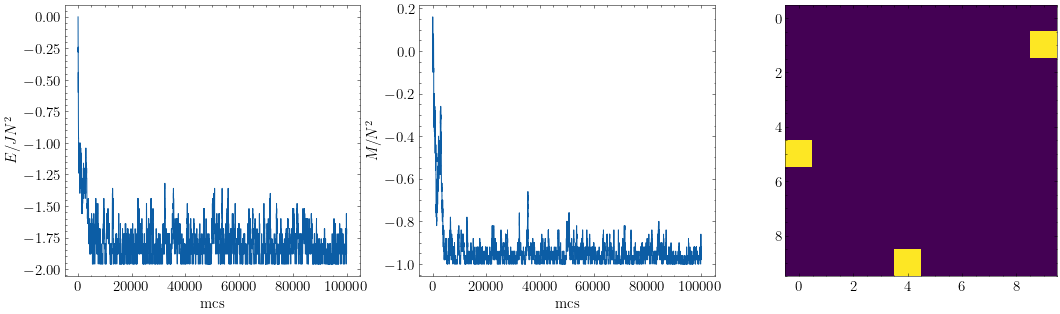

In [89]:
N = 10
T = 1.8
s = np.random.choice([-1,+1], (N,N))
steps = 100000

E_array, s_array = metropolis(s, N, T, steps)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.plot(E_array/N**2)
plt.xlabel('mcs')
plt.ylabel('$E/JN^2$')

plt.subplot(1,3,2)
plt.plot(s_array/N**2)
plt.xlabel('mcs')
plt.ylabel('$M/N^2$')

plt.subplot(1,3,3)
plt.imshow(s)

plt.show()

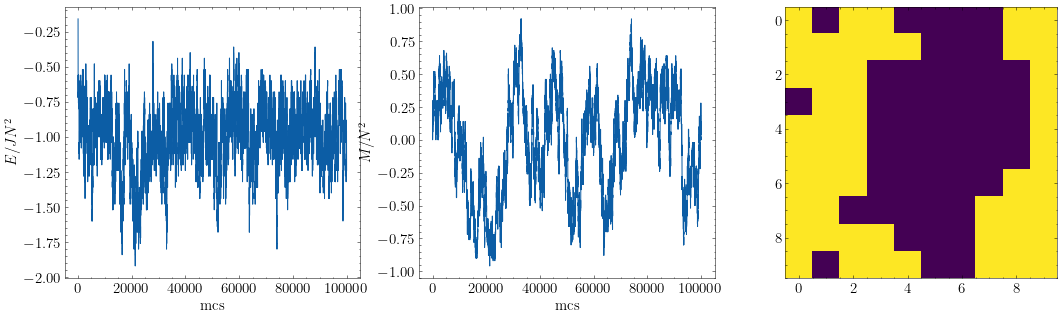

In [88]:
# Above Tc

N = 10
T = 2.8
s = np.random.choice([-1,+1], (N,N))
steps = 100000

E_array, s_array = metropolis(s, N, T, steps)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.plot(E_array/N**2)
plt.xlabel('mcs')
plt.ylabel('$E/JN^2$')

plt.subplot(1,3,2)
plt.plot(s_array/N**2)
plt.xlabel('mcs')
plt.ylabel('$M/N^2$')

plt.subplot(1,3,3)
plt.imshow(s)

plt.show()

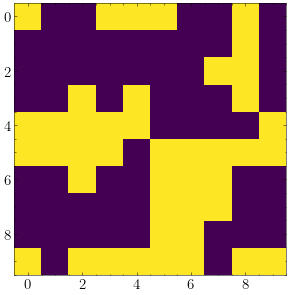

In [85]:
# Animation

N = 10
T = 1.8
s = np.random.choice([-1,+1], (N,N))
steps = 100

for mcs in range(steps):
    # Select a random spin
    i, j = np.random.randint(low=0, high=N, size=2)

    # Check energy difference  
    dE = calculate_dE(s, i, j)

    if dE <= 0:
        s[i,j] = -1*s[i,j]
    else:
        if np.random.random() < np.exp(-dE/T):
            s[i,j] = -1*s[i,j]
    
    plt.imshow(s)
    display.clear_output(wait=True)
    plt.show()

In [ ]:
# Start from a different state

In [90]:
# Let B > 0

In [ ]:
# Demon